# Make of a neural network with numpy

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import NetworkModule as nm

/tmp/ipykernel_11658/2838358554.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Using ndarrays as Tensors, adding the typing library to be more explicit and creating a new type "Func" which is a function taking a Tensor as argument and returning a Tensor

In [2]:
from numpy import ndarray as Tensor

from typing import (Dict, Tuple, Callable, 
                    Sequence, Iterator, NamedTuple)
Func = Callable[[Tensor], Tensor]

### Extracting the data from the dataset

In [3]:
# Number of data points / events taken from the dataset 
# For Training
lines_train: int = 20000
# For Validation and Testing
lines_val: int = 10000

# Different types of dataset for training, validation and testing
dataset_train = pd.read_csv('dataset_modif2.csv', usecols=np.arange(0,12), nrows=lines_train)
# The data is normalized to avoid variables with high values
norm_dataset_train = (dataset_train.values - np.min(dataset_train.values)) / (np.max(dataset_train.values) - np.min(dataset_train.values))

dataset_val = pd.read_csv('dataset_modif2.csv', usecols=np.arange(0,12), skiprows=lines_train+1, nrows=lines_val)
norm_dataset_val = (dataset_val.values - np.min(dataset_val.values)) / (np.max(dataset_val.values) - np.min(dataset_val.values))

dataset_test = pd.read_csv('dataset_modif2.csv', usecols=np.arange(0,12), skiprows=lines_train+lines_val+1, nrows=lines_val)
norm_dataset_test = (dataset_test.values - np.min(dataset_test.values)) / (np.max(dataset_test.values) - np.min(dataset_test.values))

# Labels for training, validation and testing
labels_train = pd.read_csv('dataset_modif2.csv', usecols=["label"], nrows=lines_train)
labels_val = pd.read_csv('dataset_modif2.csv', usecols=[13], skiprows=lines_train+1, nrows=lines_val)
labels_test = pd.read_csv('dataset_modif2.csv', usecols=[13], skiprows=lines_train+lines_val+1, nrows=lines_val)

# New labels for binary classification
# 0 -> 1 and 1,2 -> 0
bin_labels_train = np.where(labels_train.values == 0, 1, 0)
bin_labels_val = np.where(labels_val.values == 0, 1, 0)
bin_labels_test = np.where(labels_test.values == 0, 1, 0)

# Predictions from a previous work using the same dataset
article_val = pd.read_csv('dataset_modif2.csv', usecols=[12], skiprows=lines_train+1, nrows=lines_val)
article_test = pd.read_csv('dataset_modif2.csv', usecols=[12], skiprows=lines_train+lines_val+1, nrows=lines_val)

### Training different networks

In [4]:
seed_value: int = np.random.randint(1, 99)
print(seed_value)
batch_num: int = 1000
epochs: int = 1000

NetCE = nm.NeuralNet([
    nm.Linear(input_size=12, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=3, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=3, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=1, Seed=seed_value),
    nm.Activation(nm.sigmoid, nm.sigmoid_prime),
])

NetMSE = nm.NeuralNet([
    nm.Linear(input_size=12, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=3, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=3, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=1, Seed=seed_value),
    nm.Activation(nm.sigmoid, nm.sigmoid_prime),
])

88


In [5]:
Train_res_CE: Tuple = NetCE.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                       val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                       loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=epochs)

Val_res_CE: Tuple = NetCE.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                        loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num))

# Training
Epoch =    0 Loss = 0.759 Acc = 32.295
# Validation
Epoch =    0 Loss = 0.760 Acc = 32.750
--------------------------------------
# Training
Epoch =  100 Loss = 0.502 Acc = 67.705
# Validation
Epoch =  100 Loss = 0.514 Acc = 67.250
--------------------------------------
# Training
Epoch =  200 Loss = 0.191 Acc = 92.610
# Validation
Epoch =  200 Loss = 0.210 Acc = 91.700
--------------------------------------
# Training
Epoch =  300 Loss = 0.161 Acc = 93.700
# Validation
Epoch =  300 Loss = 0.193 Acc = 92.360
--------------------------------------
# Training
Epoch =  400 Loss = 0.136 Acc = 94.395
# Validation
Epoch =  400 Loss = 0.190 Acc = 92.480
--------------------------------------
# Training
Epoch =  500 Loss = 0.131 Acc = 94.765
# Validation
Epoch =  500 Loss = 0.192 Acc = 92.580
--------------------------------------
# Training
Epoch =  600 Loss = 0.136 Acc = 94.920
# Validation
Epoch =  600 Loss = 0.180 Acc = 92.690
--------------------------------------
# Training
Ep

In [6]:
Train_res_MSE: Tuple = NetMSE.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                       val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                       loss=nm.MeanSquareError(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=epochs)

Val_res_MSE: Tuple = NetMSE.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                        loss=nm.MeanSquareError(), iterator=nm.BatchIterator(batch_size=batch_num))

# Training
Epoch =    0 Loss = 0.375 Acc = 32.295
# Validation
Epoch =    0 Loss = 0.970 Acc = 32.750
--------------------------------------
# Training
Epoch =  100 Loss = 0.214 Acc = 67.705
# Validation
Epoch =  100 Loss = 0.634 Acc = 67.250
--------------------------------------
# Training
Epoch =  200 Loss = 0.201 Acc = 67.705
# Validation
Epoch =  200 Loss = 0.613 Acc = 67.250
--------------------------------------
# Training
Epoch =  300 Loss = 0.088 Acc = 90.805
# Validation
Epoch =  300 Loss = 0.284 Acc = 90.550
--------------------------------------
# Training
Epoch =  400 Loss = 0.063 Acc = 92.020
# Validation
Epoch =  400 Loss = 0.229 Acc = 91.250
--------------------------------------
# Training
Epoch =  500 Loss = 0.060 Acc = 92.720
# Validation
Epoch =  500 Loss = 0.207 Acc = 91.720
--------------------------------------
# Training
Epoch =  600 Loss = 0.050 Acc = 93.190
# Validation
Epoch =  600 Loss = 0.208 Acc = 92.060
--------------------------------------
# Training
Ep

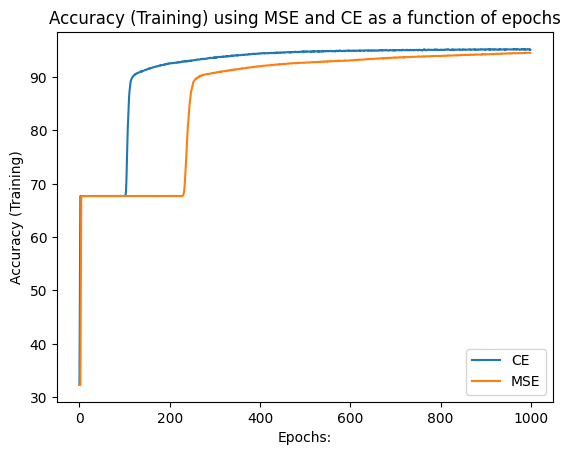

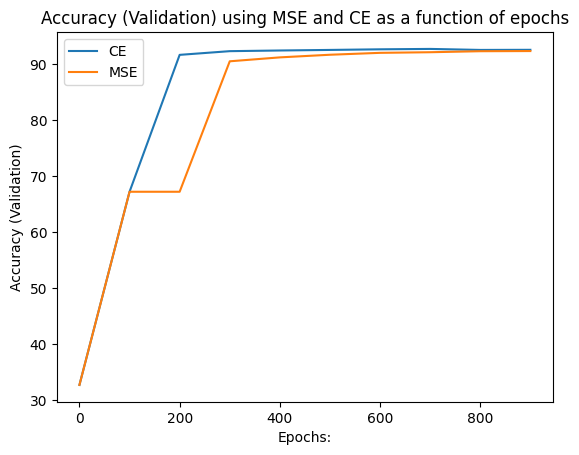

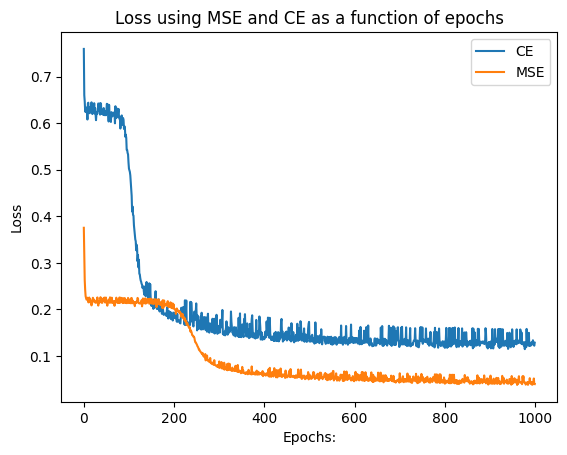

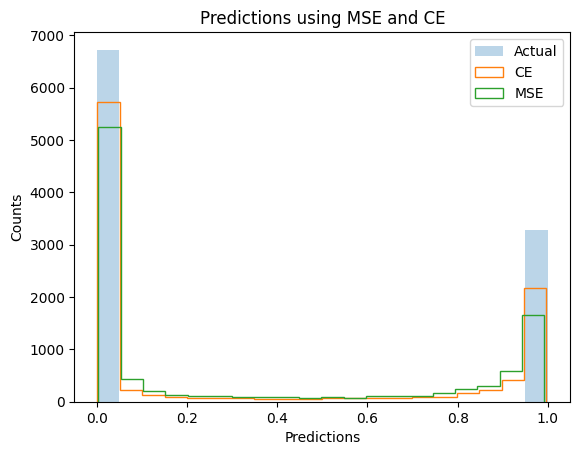

In [7]:
plt.plot(Train_res_CE[1], label='CE')
plt.plot(Train_res_MSE[1], label='MSE')
plt.ylabel('Accuracy (Training)')
plt.xlabel("Epochs:")
plt.title('Accuracy (Training) using MSE and CE as a function of epochs')
plt.legend()
plt.show()

plt.plot(np.arange(0, epochs, 100), Train_res_CE[5], label='CE')
plt.plot(np.arange(0, epochs, 100), Train_res_MSE[5], label='MSE')
plt.ylabel('Accuracy (Validation)')
plt.xlabel("Epochs:")
plt.title('Accuracy (Validation) using MSE and CE as a function of epochs')
plt.legend()
plt.show()

plt.plot(Train_res_CE[0], label='CE')
plt.plot(Train_res_MSE[0], label='MSE')
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.title('Loss using MSE and CE as a function of epochs')
plt.legend()
plt.show()

plt.hist(Val_res_CE[2], histtype='bar', bins=20, alpha=0.3, label='Actual')
plt.hist(Val_res_CE[3], histtype='step', bins=20, label='CE')
plt.hist(Val_res_MSE[3], histtype='step', bins=20, label='MSE')
plt.xlabel("Predictions")
plt.ylabel("Counts")
plt.title('Predictions using MSE and CE')
plt.legend()
plt.show()

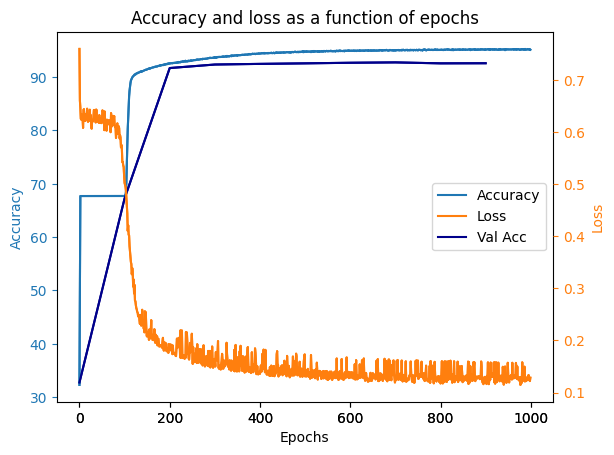

In [8]:
fig=plt.figure()
ax1=fig.add_subplot(111, label='Accuracy')
ax2=fig.add_subplot(111, label='Loss', frame_on=False)

ax1.set_title('Accuracy and loss as a function of epochs')

ax1.plot(Train_res_CE[1], color="C0")
ax1.plot(np.arange(0, epochs, 100), Train_res_CE[5], color = 'darkblue')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color="C0")
ax1.tick_params(axis='y', colors="C0")

ax2.plot(Train_res_CE[0], color="C1") 
ax2.set_ylabel('Loss', color="C1")       
ax2.yaxis.set_label_position('right') 
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', colors="C1")

l1,=ax1.plot(Train_res_CE[1], color="C0")
l2,=ax2.plot(Train_res_CE[0], color="C1")
l3,=ax1.plot(np.arange(0, epochs, 100), Train_res_CE[5], color = 'darkblue')
plt.legend([l1, l2, l3], ["Accuracy", "Loss", "Val Acc"], loc = "center right")
plt.show()

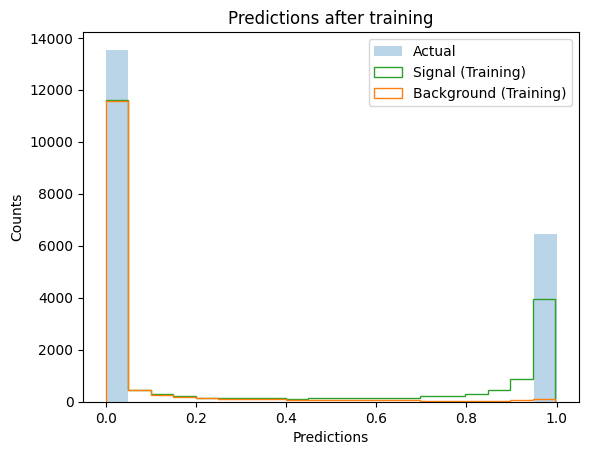

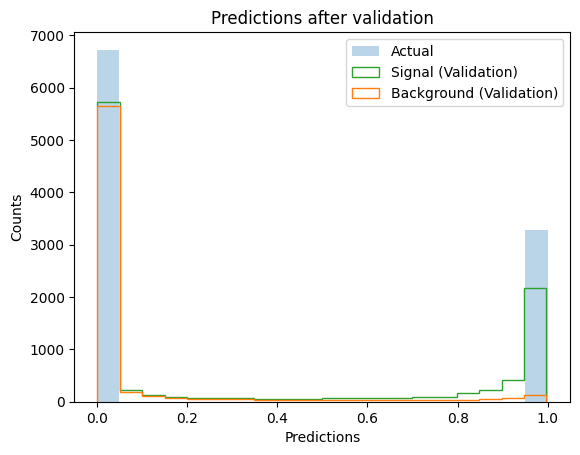

In [9]:
Pred_back: Sequence = []
Pred_sig: Sequence = []

# Separate signal and background events
for i in range(0, len(Val_res_CE[2])):
    if Val_res_CE[2][i] == 0:
        Pred_back.append(Val_res_CE[3][i][0])
    else:
        Pred_sig.append(Val_res_CE[3][i][0])

Pred_back_arr = np.array(Pred_back)
Pred_sig_arr = np.array(Pred_sig)

Pred_back_t: Sequence = []
Pred_sig_t: Sequence = []

# Separate signal and background events (train)
for i in range(0, len(Train_res_CE[2])):
    if Train_res_CE[2][i] == 0:
        Pred_back_t.append(Train_res_CE[3][i][0])
    else:
        Pred_sig_t.append(Train_res_CE[3][i][0])

Pred_back_t_arr = np.array(Pred_back_t)
Pred_sig_t_arr = np.array(Pred_sig_t)

plt.hist(Train_res_CE[2], histtype='bar', bins=20, alpha=0.3, label='Actual')
plt.hist([Pred_back_t_arr, Pred_sig_t_arr], histtype='step', stacked=True, bins=20,
         label=['Background (Training)', 'Signal (Training)'])
plt.xlabel("Predictions")
plt.ylabel("Counts")
plt.title("Predictions after training")
plt.legend()
plt.show()

plt.hist(Val_res_CE[2], histtype='bar', bins=20, alpha=0.3, label='Actual')
plt.hist([Pred_back_arr, Pred_sig_arr], histtype='step', stacked=True, bins=20,
         label=['Background (Validation)', 'Signal (Validation)'])
plt.xlabel("Predictions")
plt.ylabel("Counts")
plt.title("Predictions after validation")
plt.legend()
plt.show()

### Assessing a good cut value for accuracy computation

In [10]:
cut_range = np.arange(0.1, 1, 0.1)

Acc_cut_tot: Sequence = []
Acc_cut_back: Sequence = []
Acc_cut_sig: Sequence = []
Acc_cut_article: Sequence =[]

for cut in cut_range:
    
    net_c = nm.NeuralNet([
        nm.Linear(input_size=12, output_size=9, Seed=seed_value),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=3, Seed=seed_value),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=3, output_size=9, Seed=seed_value),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=1, Seed=seed_value),
        nm.Activation(nm.sigmoid, nm.sigmoid_prime),
    ])

    Train_res_c: Tuple = net_c.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                    val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                    loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=epochs, cut=cut, Print=False)

    Val_res_c: Tuple = net_c.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                            loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), cut=cut)
    
    Actual_back: Sequence = []
    Pred_back: Sequence = []
    Actual_sig: Sequence = []
    Pred_sig: Sequence = []

    # Separate signal and background events
    for i in range(0, len(Val_res_c[2])):
        if Val_res_c[2][i] == 0:
            Actual_back.append(Val_res_c[2][i])
            Pred_back.append(Val_res_c[3][i])
        else:
            Actual_sig.append(Val_res_c[2][i])
            Pred_sig.append(Val_res_c[3][i])

    Actual_back_arr = np.array(Actual_back)
    Pred_back_arr = np.array(Pred_back)
    Actual_sig_arr = np.array(Actual_sig)
    Pred_sig_arr = np.array(Pred_sig)

    # Compute accuracy for signal and background
    Round_back = np.where(Pred_back_arr >= cut, 1, 0)
    Round_sig = np.where(Pred_sig_arr >= cut, 1, 0)
    Acc_back = np.mean(Round_back==Actual_back_arr) * 100
    Acc_sig = np.mean(Round_sig==Actual_sig_arr) * 100
    
    Round_article = np.where(article_val.values >= cut, 1, 0)
    Acc_article_val = np.mean(Round_article==bin_labels_val) * 100

    Acc_cut_tot.append(Val_res_c[1])
    Acc_cut_back.append(Acc_back)
    Acc_cut_sig.append(Acc_sig)
    Acc_cut_article.append(Acc_article_val)

    print(f'Cut = {cut:.1f}')
    print(f'Acc = {Val_res_c[1]:.3f} Acc back = {Acc_back:.3f} Acc sig = {Acc_sig:.3f}')
    print(f'Acc article = {Acc_article_val:.3f}')
    print("-----------------------------------------------")

Cut = 0.1
Acc = 89.980 Acc back = 86.736 Acc sig = 96.641
Acc article = 93.620
-----------------------------------------------
Cut = 0.2
Acc = 91.280 Acc back = 89.368 Acc sig = 95.206
Acc article = 90.410
-----------------------------------------------
Cut = 0.3
Acc = 91.930 Acc back = 90.840 Acc sig = 94.168
Acc article = 87.030
-----------------------------------------------
Cut = 0.4
Acc = 92.440 Acc back = 92.178 Acc sig = 92.977
Acc article = 83.910
-----------------------------------------------
Cut = 0.5
Acc = 92.500 Acc back = 93.130 Acc sig = 91.206
Acc article = 80.530
-----------------------------------------------
Cut = 0.6
Acc = 92.560 Acc back = 94.201 Acc sig = 89.191
Acc article = 77.770
-----------------------------------------------
Cut = 0.7
Acc = 92.180 Acc back = 95.108 Acc sig = 86.168
Acc article = 74.930
-----------------------------------------------
Cut = 0.8
Acc = 91.600 Acc back = 95.985 Acc sig = 82.595
Acc article = 72.360
--------------------------------

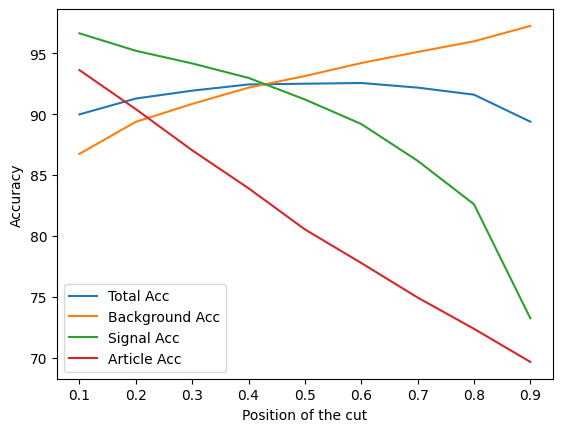

In [11]:
plt.plot(cut_range, Acc_cut_tot, label='Total Acc')
plt.plot(cut_range, Acc_cut_back, label='Background Acc')
plt.plot(cut_range, Acc_cut_sig, label='Signal Acc')
plt.plot(cut_range, Acc_cut_article, label='Article Acc')
plt.xlabel("Position of the cut")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Round_article_test = np.where(article_test.values >= 0.1, 1, 0)
Acc_article = np.mean(Round_article_test==bin_labels_test) * 100

### Ploting the signal against background distribution for specific input variables

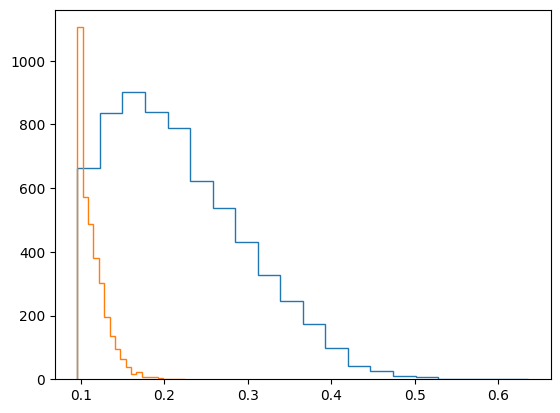

In [12]:
In_back: Sequence = []
In_sig: Sequence = []

# Separate signal and background events
for i in range(0, len(Val_res_CE[3])):
    if np.round(Val_res_CE[3][i]) == 0:
        In_back.append(Val_res_CE[4][i])
    else:
        In_sig.append(Val_res_CE[4][i])

In_back_arr = np.array(In_back)
In_sig_arr = np.array(In_sig)

plt.hist(In_back_arr[:, 0], histtype='step', bins=20)
plt.hist(In_sig_arr[:, 0], histtype='step', bins=20)
plt.show()

### Final test accuracy

In [13]:
Acc_tot: Sequence = []
Acc_back_tot: Sequence = []
Acc_sig_tot: Sequence =[]
Loss_tot: Sequence = []
Pred_tot: Sequence = []

# Compute the accuracy for different random initializations
for N in range(10):

    net = nm.NeuralNet([
        nm.Linear(input_size=12, output_size=9),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=3),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=3, output_size=9),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=1),
        nm.Activation(nm.sigmoid, nm.sigmoid_prime),
    ])

    Train_res: Tuple = net.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                    val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                    loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=500, cut=0.1, Print=False)

    Test_res: Tuple = net.validate(inputs=norm_dataset_test, targets=bin_labels_test,
                                            loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), cut=0.1)
    
    Actual_back: Sequence = []
    Pred_back: Sequence = []
    Actual_sig: Sequence = []
    Pred_sig: Sequence = []

    # Separate signal and background events
    for i in range(0, len(Test_res[2])):
        if Test_res[2][i] == 0:
            Actual_back.append(Test_res[2][i])
            Pred_back.append(Test_res[3][i])
        else:
            Actual_sig.append(Test_res[2][i])
            Pred_sig.append(Test_res[3][i])

    Actual_back_arr = np.array(Actual_back)
    Pred_back_arr = np.array(Pred_back)
    Actual_sig_arr = np.array(Actual_sig)
    Pred_sig_arr = np.array(Pred_sig)

    # Compute accuracy for signal and background
    Round_back = np.where(Pred_back_arr >= 0.1, 1, 0)
    Round_sig = np.where(Pred_sig_arr >= 0.1, 1, 0)
    Acc_back = np.mean(Round_back==Actual_back_arr) * 100
    Acc_sig = np.mean(Round_sig==Actual_sig_arr) * 100
    
    Acc_tot.append(Test_res[1])
    Acc_back_tot.append(Acc_back)
    Acc_sig_tot.append(Acc_sig)
    Loss_tot.append(Test_res[0])
    Pred_tot.append(Test_res[3])

    # Print accuracies for each iteration
    print(f'Acc = {Test_res[1]:.3f} Acc back = {Acc_back:.3f} Acc sig = {Acc_sig:.3f}')


Acc_back_arr = np.array(Acc_back_tot)
Acc_sig_arr = np.array(Acc_sig_tot)
Acc_array = np.array(Acc_tot)

# Compute the final accuracies as the mean on the iterations
Acc_final = np.mean(Acc_array)
Acc_back_final = np.mean(Acc_back_arr)
Acc_sig_final = np.mean(Acc_sig_arr)

print("---------------------Means---------------------")
print(f'Acc = {Acc_final:.3f} Acc back = {Acc_back_final:.3f} Acc sig = {Acc_sig_final:.3f}')
print(f'Acc article = {Acc_article:.3f}')

Acc = 92.590 Acc back = 94.654 Acc sig = 88.263
Acc = 91.350 Acc back = 88.584 Acc sig = 97.151
Acc = 32.290 Acc back = 0.000 Acc sig = 100.000
Acc = 90.840 Acc back = 87.653 Acc sig = 97.522
Acc = 88.400 Acc back = 98.375 Acc sig = 67.482
Acc = 91.850 Acc back = 89.632 Acc sig = 96.500
Acc = 92.530 Acc back = 94.536 Acc sig = 88.325
Acc = 90.910 Acc back = 87.816 Acc sig = 97.399
Acc = 93.250 Acc back = 94.329 Acc sig = 90.988
Acc = 90.220 Acc back = 86.398 Acc sig = 98.235
---------------------Means---------------------
Acc = 85.423 Acc back = 82.198 Acc sig = 92.186
Acc article = 94.060
